In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rgb_flat_chessboard = cv2.imread('Images/flat_chessboard.png')
flat_chessboard = cv2.cvtColor(rgb_flat_chessboard,cv2.COLOR_BGR2GRAY)

rgb_real_chessboard = cv2.imread('Images/real_chessboard.jpg')
real_chessboard = cv2.cvtColor(rgb_real_chessboard,cv2.COLOR_BGR2GRAY)

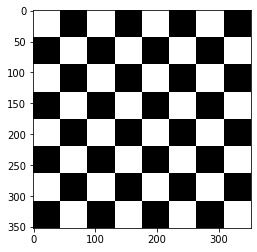

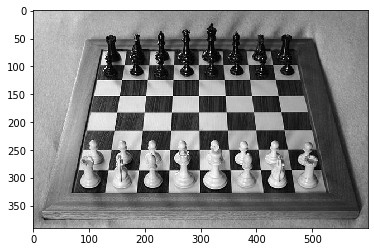

In [3]:
plt.imshow(flat_chessboard,cmap='gray')
plt.show()
plt.imshow(real_chessboard,'gray')

# Harris Corner Detection

In [56]:
def detectViaHarris(gray_image_source,rgb_image):
    gray_images = np.float32(gray_image_source)
    destination = cv2.cornerHarris(src=gray_images,blockSize=2,ksize=3,k=0.04)
    destination_dilate = cv2.dilate(destination,None)
    
    # Applying detection
    rgb_image[destination_dilate>0.01*destination_dilate.max()] = [0,0,255]
    
    fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
    plt.tight_layout()
    
    axes[0].imshow(destination)
    axes[0].set_title('Corner Harris Detection (without dilate)')
    
    axes[1].imshow(destination_dilate)
    axes[1].set_title('Corner Harris Detection (with dilate)')
    
    axes[2].imshow(cv2.cvtColor(rgb_image,cv2.COLOR_BGR2RGB))
    axes[2].set_title('Final Result Corner Harris Detection')

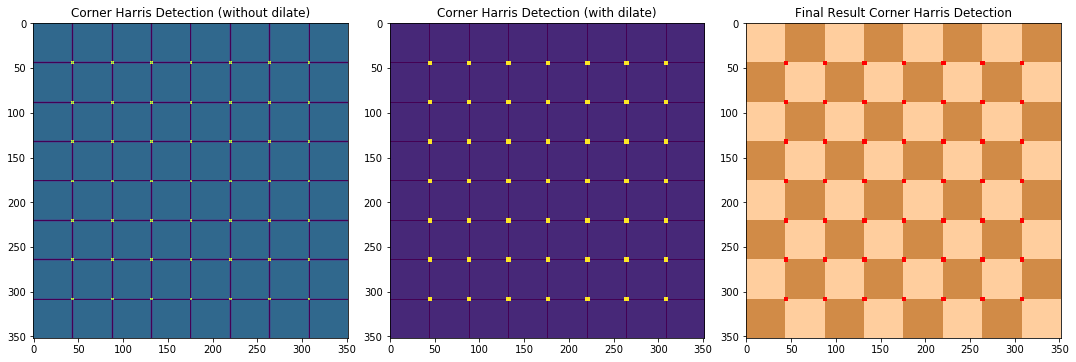

In [57]:
detectViaHarris(flat_chessboard,rgb_flat_chessboard)

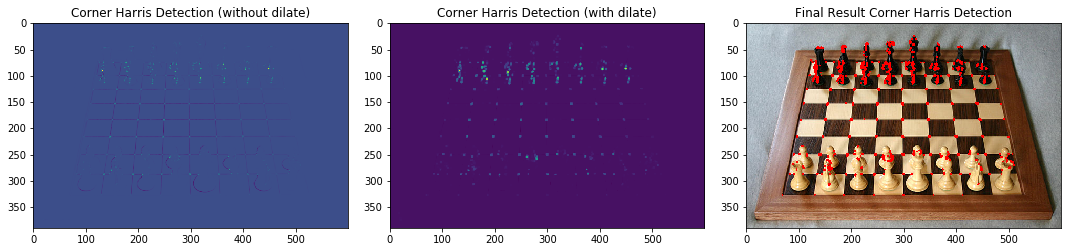

In [45]:
detectViaHarris(real_chessboard,rgb_real_chessboard)

# Harris Detection Using Camera

In [29]:
def detectLiveViaHarris(gray_image_source,rgb_image):
    gray_images = np.float32(gray_image_source)
    destination = cv2.cornerHarris(src=gray_images,blockSize=2,ksize=3,k=0.04)    
    destination = cv2.dilate(destination,None)
    
    # Applying detection
    rgb_image[destination>0.01*destination.max()] = [0,0,255]
    return rgb_image

In [30]:
videoCapture = cv2.VideoCapture(0)
while True:
    res,frame = videoCapture.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('Camera',detectLiveViaHarris(gray,frame))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
videoCapture.release()
cv2.destroyAllWindows()